<a href="https://colab.research.google.com/github/was101/KDT3-/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%9E%90%EC%A0%84%EA%B1%B0%EB%8C%80%EC%97%AC%EC%98%88%EC%B8%A1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime #day

train = pd.read_csv('/content/train2.csv')
test = pd.read_csv('/content/test2.csv')

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
train.describe()

In [ ]:
train.info()

In [ ]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"] = train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
train["month"] = train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
train["season"] = train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train["weather"] = train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })


In [ ]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    train[var] = train[var].astype("category")

In [ ]:
train_1 = train.copy()
test_1 = test.copy()

train_1['datetime'] = pd.to_datetime(train_1['datetime']) #drop안했음.
#슬라이싱이 가능하게 datetime구조로 바꿈.
train_1.dtypes

In [ ]:
train_1['year'] = train_1['datetime'].dt.year
train_1['month'] = train_1['datetime'].dt.month
train_1['day'] = train_1['datetime'].dt.day
train_1['hour'] = train_1['datetime'].dt.hour
train_1['minute'] = train_1['datetime'].dt.minute
train_1['second'] = train_1['datetime'].dt.second
#요일 데이터 -일요일은 0
train_1['dayofweek'] = train_1['datetime'].dt.dayofweek

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'Hour rental amount')]

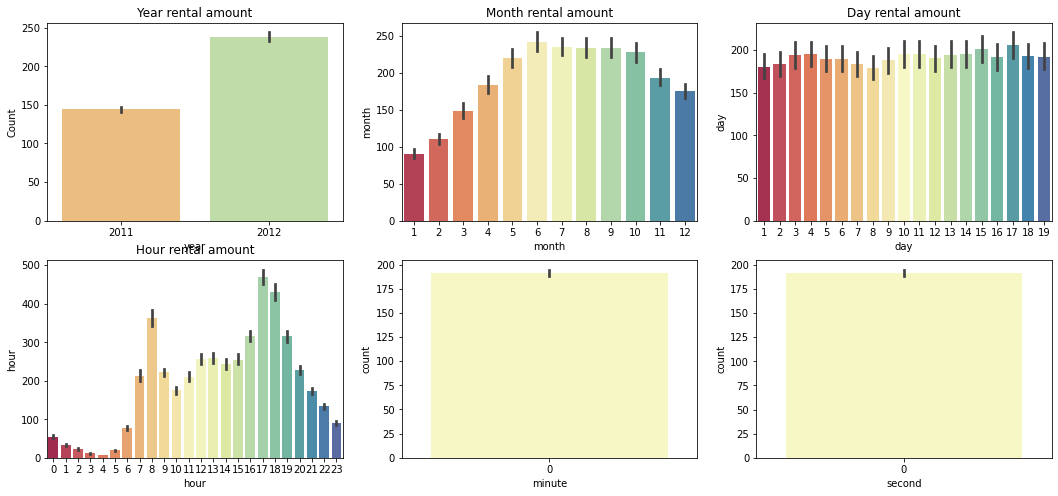

In [ ]:

figure, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

sns.barplot(palette='Spectral',data=train_1, x="year", y="count", ax=ax1)
sns.barplot(palette='Spectral',data=train_1, x="month", y="count", ax=ax2)
sns.barplot(palette='Spectral',data=train_1, x="day", y="count", ax=ax3)
sns.barplot(palette='Spectral',data=train_1, x="hour", y="count", ax=ax4)
sns.barplot(palette='Spectral',data=train_1, x="minute", y="count", ax=ax5)
sns.barplot(palette='Spectral',data=train_1, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count', title ="Year rental amount")
ax2.set(ylabel='month', title ="Month rental amount")
ax3.set(ylabel='day', title ="Day rental amount")
ax4.set(ylabel='hour', title ="Hour rental amount")

#Day는 분석하면 안됨.-> 달마다 요일이 달라서 카운트 다 다릅니다->지표가 달라짐->분석모델 X

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

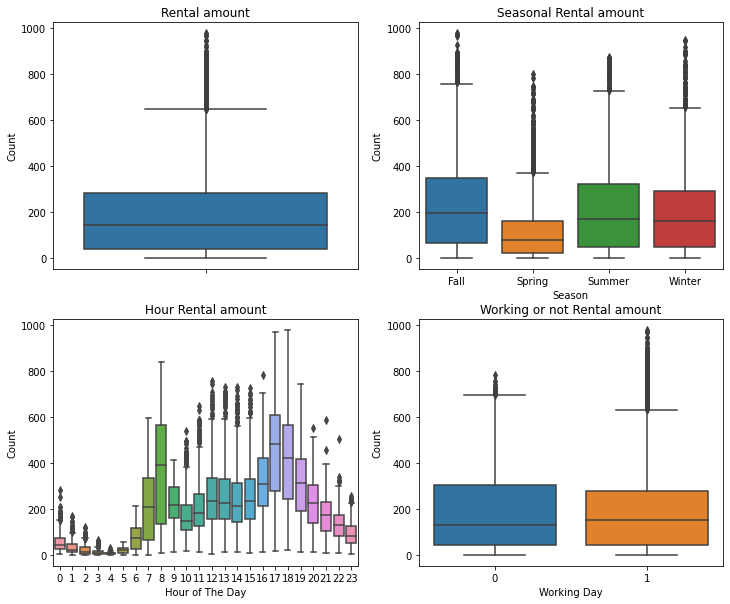

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train_1, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=train_1, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=train_1, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=train_1, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")


#이상치가 너무 많음 ->이상치 처리를 해줘야 겠구나!

<Axes: xlabel='hour', ylabel='count'>

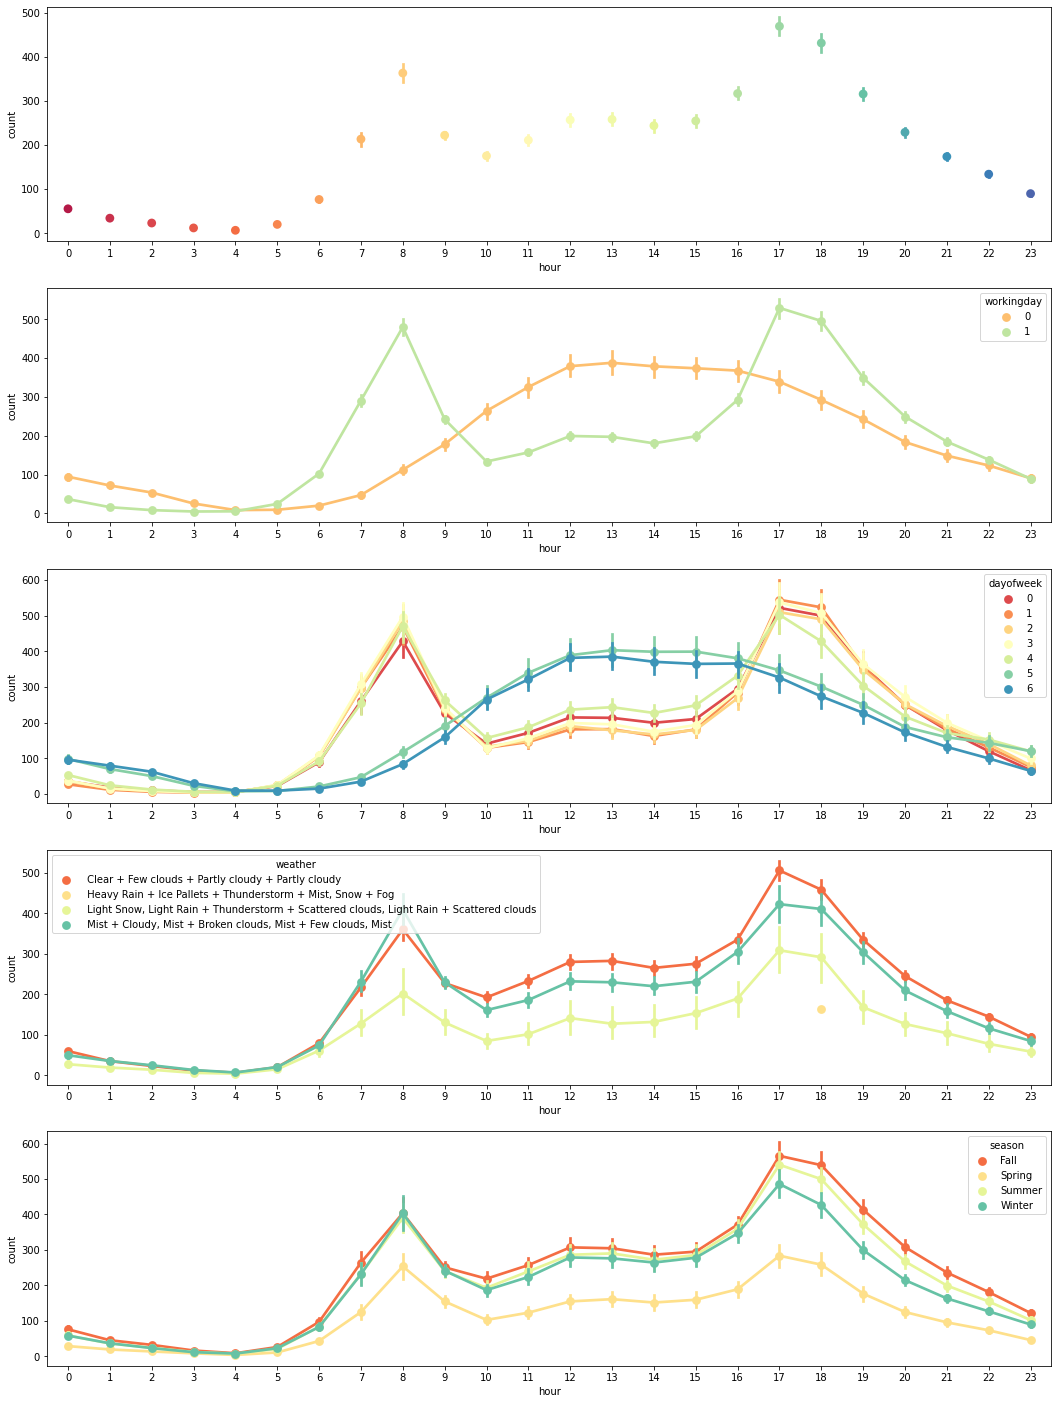

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

#꺽은선 그래프.
sns.pointplot(palette='Spectral',data=train_1, x="hour",y="count",ax=ax1)
sns.pointplot(palette='Spectral',data=train_1, x="hour",y="count", hue="workingday",ax=ax2)
sns.pointplot(palette='Spectral',data=train_1, x="hour",y="count", hue="dayofweek",ax=ax3)
sns.pointplot(palette='Spectral',data=train_1, x="hour",y="count", hue="weather",ax=ax4)
sns.pointplot(palette='Spectral',data=train_1, x="hour",y="count", hue="season",ax=ax5)
#꺽은선을 그래프를 본 결과는 출퇴근시간에 많긴 많다!

In [ ]:

# corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count"]]
#상관 계수 측정
corrMatt = train_1.corr()
print(corrMatt)
mask =np.array(corrMatt)
#Return the indices for the upper-triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)]=False #상삼각행렬 False ->하삼각행렬


                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   
hour        0.145430  0.140343 -0.278011   0.146631  0.302045    0.380540   
month       0.257589  0.264173  0.204537  -0.150192  0.092722    0.169451   
year        0.061226  0.058540 -0.078606  -0.015221  0.145241    0.264265   
day         0.015551  0.011866 -0.011335   0.036157  0.014109    0.019111   
minute           NaN       NaN       NaN        NaN       NaN         NaN   

<Axes: >

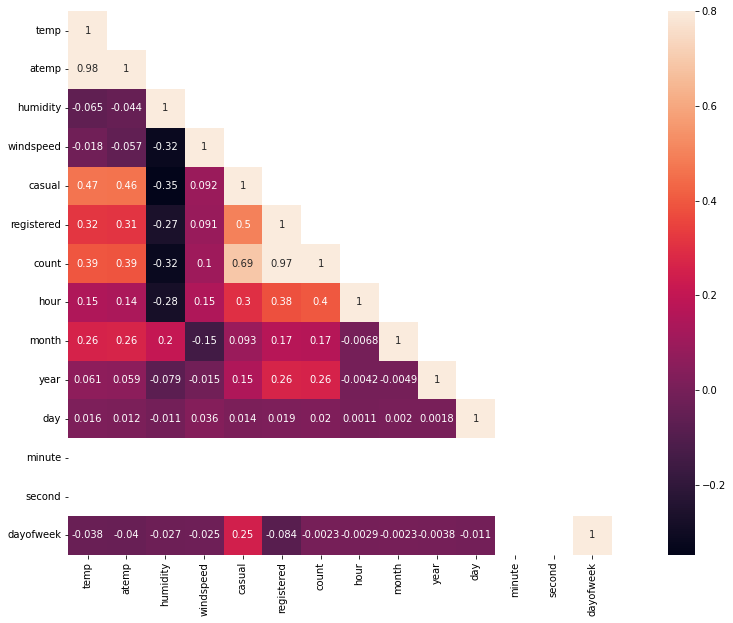

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8,square= True, annot=True)

<Axes: xlabel='humidity', ylabel='count'>

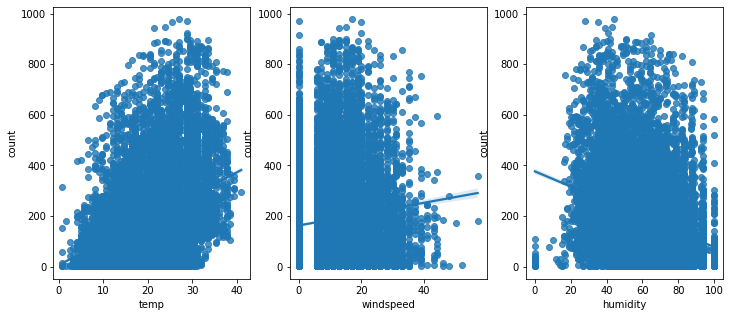

In [ ]:

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count",data=train_1, ax=ax1)
sns.regplot(x="windspeed",y="count",data=train_1, ax=ax2)
sns.regplot(x="humidity",y="count",data=train_1, ax=ax3)

# temp,windspeed,humidity -> 회귀로 절대로 못맞침(상관계수가 낮음->sctter->drop 하는것이 좋지 않을까? ->항상 좋을까? ->실험적이여야 함.)

In [ ]:
count_q1 = np.percentile(train_1['count'],25)
count_q3 = np.percentile(train_1['count'],75)

count_IQR = count_q3-count_q1

train_1_IQR = train[(train_1['count']>= (count_q1-(1.5*count_IQR))) & (train_1['count']<=(count_q3 + (1.5 * count_IQR)))]

print(train_1_IQR)

                  datetime  season holiday workingday  \
0      2011-01-01 00:00:00  Spring       0          0   
1      2011-01-01 01:00:00  Spring       0          0   
2      2011-01-01 02:00:00  Spring       0          0   
3      2011-01-01 03:00:00  Spring       0          0   
4      2011-01-01 04:00:00  Spring       0          0   
...                    ...     ...     ...        ...   
10881  2012-12-19 19:00:00  Winter       0          1   
10882  2012-12-19 20:00:00  Winter       0          1   
10883  2012-12-19 21:00:00  Winter       0          1   
10884  2012-12-19 22:00:00  Winter       0          1   
10885  2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp  \
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395   
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear +

In [ ]:
train_1_sigma = train_1[np.abs(train_1['count'] - train['count'].mean()) <= 3*train_1['count'].std()]

print(train_1_sigma)

                 datetime  season holiday workingday  \
0     2011-01-01 00:00:00  Spring       0          0   
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp  \
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395   
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

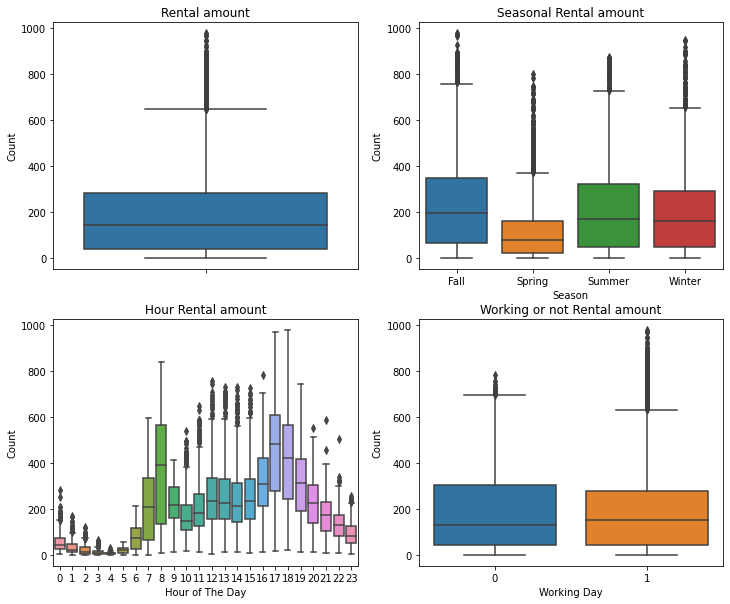

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train_1, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=train_1, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=train_1, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=train_1, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")


#이상치가 너무 많음 ->이상치 처리를 해줘야 겠구나!

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

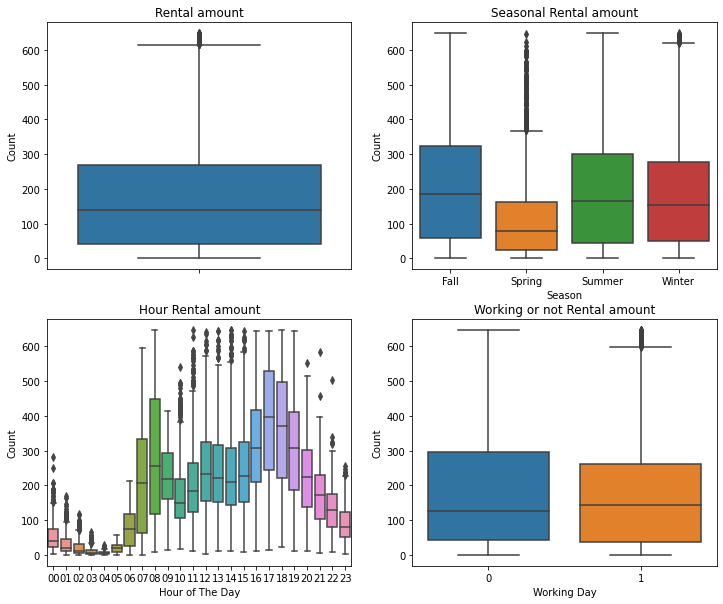

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train_1_IQR, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=train_1_IQR, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=train_1_IQR, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=train_1_IQR, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")


#이상치가 너무 많음 ->이상치 처리를 해줘야 겠구나!

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

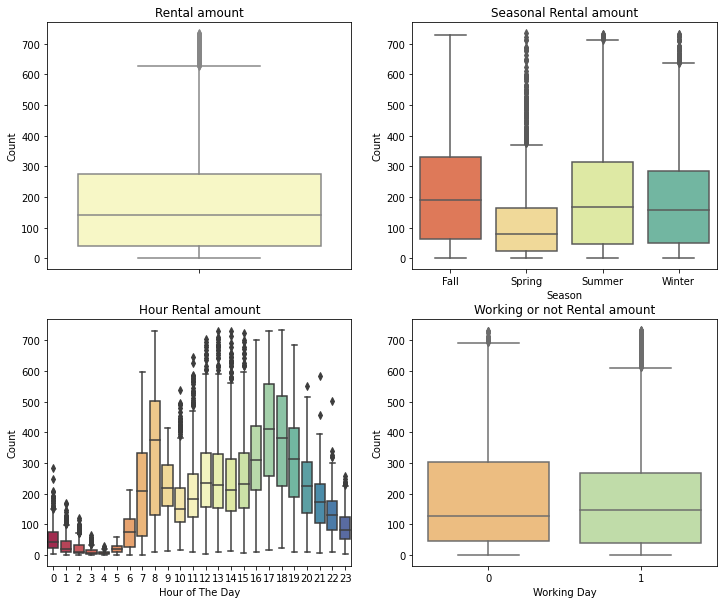

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(palette='Spectral',data=train_1_sigma, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(palette='Spectral',data=train_1_sigma, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(palette='Spectral',data=train_1_sigma, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(palette='Spectral',data=train_1_sigma, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")


#이상치가 너무 많음 ->이상치 처리를 해줘야 겠구나!

In [ ]:
dataTrain = pd.read_csv('/content/train2.csv')
dataTest = pd.read_csv('/content/test2.csv')

In [ ]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [ ]:
data['date'] = data.datetime.apply(lambda x : x.split()[0])
data['hour'] = data.datetime.apply(lambda x : x.split()[1].split(':')[0]).astype('int')
data['year'] = data.datetime.apply(lambda x : x.split()[0].split('-')[0])
data['weekday'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').weekday())
data['month'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)

In [ ]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [ ]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [ ]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
yLabelsRegistered = dataTrain['registered']
yLabelsCasual = dataTrain['casual']

In [ ]:
dataTrain = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#np.nan_to_num : Replace NaN with zero and infinity with large finite numbers (default behaviour)
#or with the numbers defined by the user using the nan, posinf and/or neginf keywords.

In [ ]:
np.log(np.nan)

nan

In [ ]:
np.nan_to_num(np.log(np.exp(np.NaN)))

0.0

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
#sklearn의 mean_squared_error 이용해 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))


#MSE, RMSE, RMSLE 계산
def evaluate_rgre(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

In [ ]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
dataTrain['year'] = pd.to_numeric(dataTrain.year,errors='coerce')
dataTrain['month'] = pd.to_numeric(dataTrain.month,errors='coerce')
dataTrain['hour'] = pd.to_numeric(dataTrain.hour,errors='coerce')
dataTrain['weekday'] = pd.to_numeric(dataTrain.weekday,errors='coerce')

dataTrain['season'] = pd.to_numeric(dataTrain.season,errors='coerce')
dataTrain['holiday'] = pd.to_numeric(dataTrain.holiday,errors='coerce')
dataTrain['workingday'] = pd.to_numeric(dataTrain.workingday,errors='coerce')
dataTrain['weather'] = pd.to_numeric(dataTrain.weather,errors='coerce')

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

lModel = LinearRegression()

yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain, y = yLabelsLog)

preds = lModel.predict(X=dataTrain)
print('RMSLE Value For Linear Regression: ',rmsle(np.exp(yLabelsLog),np.exp(preds)))

RMSLE Value For Linear Regression:  0.9778188829547171


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9778188678218579
CPU times: user 756 ms, sys: 559 ms, total: 1.31 s
Wall time: 1.55 s


<Axes: xlabel='param_alpha', ylabel='rmsle'>

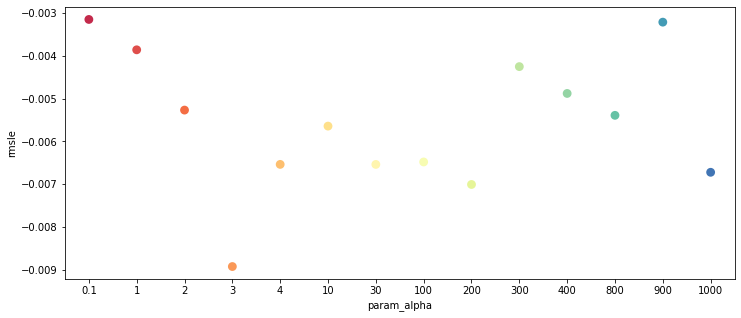

In [ ]:
%%time
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(palette='Spectral',data=df,x=df['param_alpha'],y="rmsle",ax=ax)

{'alpha': 0.0033333333333333335, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.977940093509725


<Axes: xlabel='param_alpha', ylabel='rmsle'>

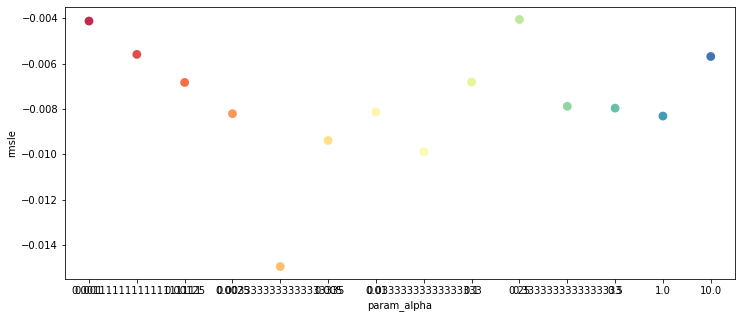

In [ ]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(palette='Spectral',data=df,x=df['param_alpha'],y="rmsle",ax=ax)